In [334]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import Math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from utils import display_dfs

In [339]:
# Load World Bank Food Prices for Nutrition Dataset
# https://databank.worldbank.org/source/food-prices-for-nutrition#

df = pd.read_csv('P_Data_Extract_From_Food_Prices_for_Nutrition/5dd4c2e1-be53-43f3-b5e7-724462db466d_Data.csv')

# Filter for the 2.0 dataset
df = df[df["Classification Code"] == "FPN 2.0"]

# Select the relevant columns
df.rename(columns={"Cost of a healthy diet [CoHD]": "Cost"}, inplace=True)
df = df[["Country Name", "Time", "Cost"]]

# Covert the Cost column to a float
df["Cost"] = pd.to_numeric(df["Cost"], errors='coerce')

# Convert the Time column to a datetime
df["Time"] = pd.to_datetime(df["Time"], format="%Y")

# Filter by Country Income
low_income_food_prices_df = df[df["Country Name"] == "Low income"].reset_index(drop=True)
high_income_food_prices_df = df[df["Country Name"] == "High income"].reset_index(drop=True)

dfs = {"Low Income": low_income_food_prices_df, "High Income": high_income_food_prices_df}

# Print the dataframes to stdout
display_dfs(dfs)

,Country Name,Time,Cost
0,Low income,2017-01-01,3.084
1,Low income,2018-01-01,3.110
2,Low income,2019-01-01,3.138
3,Low income,2020-01-01,3.217
4,Low income,2021-01-01,3.369
,Country Name,Time,Cost
0,High income,2017-01-01,3.152
1,High income,2018-01-01,3.210
2,High income,2019-01-01,3.294
3,High income,2020-01-01,3.363


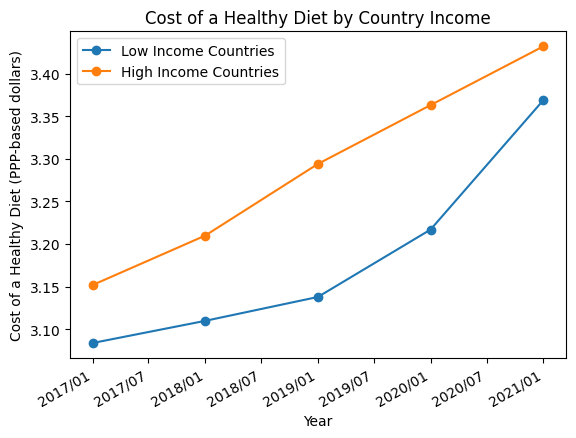

In [336]:
# Plot the data on a line graph

# Low Income Countries
plt.plot(low_income_food_prices_df["Time"], low_income_food_prices_df["Cost"], label="Low Income Countries", marker="o")

# High Income Countries
plt.plot(high_income_food_prices_df["Time"], high_income_food_prices_df["Cost"], label="High Income Countries", marker="o")

# Add labels
plt.xlabel("Year")
plt.ylabel("Cost of a Healthy Diet (PPP-based dollars)")
plt.title("Cost of a Healthy Diet by Country Income")
plt.legend()

hfmt = mdates.DateFormatter('%Y/%m')
plt.gca().xaxis.set_major_formatter(hfmt)
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()

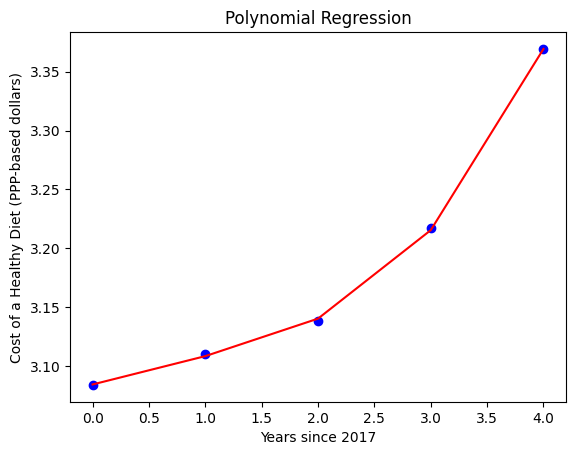

In [337]:
# Polynomial Regression

df = low_income_food_prices_df.copy()

# Convert Time column to list of integers starting at 0 for the first year and incrementing by 1 for each year
start_year = df["Time"].dt.year.min()
df["Time"] = df["Time"].dt.year - start_year

# Features and the target variables
X = df["Time"].to_numpy().reshape(-1, 1)
y = df["Cost"].to_numpy()

# Fitting Polynomial Regression to the dataset
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Visualizing the Polynomial Regression results
plt.scatter(X, y, color='blue')
 
plt.plot(X, lin_reg.predict(poly.fit_transform(X)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel(f'Years since {start_year}')
plt.ylabel("Cost of a Healthy Diet (PPP-based dollars)")

plt.show()

In [353]:
# Build an equation for the polynomial regression

# Unpack the coefficients
coefficients = lin_reg.coef_
_, lin_coef, quad_coef, cubic_coef, = coefficients
intercept = lin_reg.intercept_

# Print the equation
display(Math(f"y = {cubic_coef}x^3 {quad_coef}x^2 + {lin_coef}x + {intercept}"))

# R^2 value
r2 = lin_reg.score(X_poly, y)
display(Math(f"R^2: {r2}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

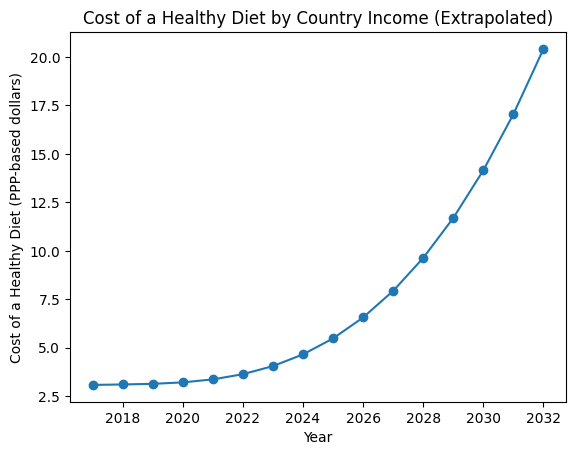

In [349]:
# Extrapolate the cost of a healthy diet for lower income countries in the coming years

# Create a cubic util function
def cubic(x):
    return cubic_coef * x**3 + quad_coef * x**2 + lin_coef * x + intercept

# Predict the cost of a healthy diet for the next 15 years
years_since_start_of_dataset = range(0, 16)
costs = [cubic(year) for year in years_since_start_of_dataset]
years = [year + start_year for year in years_since_start_of_dataset]

# Create a dataframe for the predictions
predictions_df = pd.DataFrame({"Time": years, "Cost": costs})

# Plot the predictions
plt.plot(predictions_df["Time"], predictions_df["Cost"], label="Predicted Cost", marker="o")
plt.xlabel("Year")
plt.ylabel("Cost of a Healthy Diet (PPP-based dollars)")
plt.title("Cost of a Healthy Diet by Country Income (Extrapolated)")
plt.show()